In [6]:
import pandas as pd
import numpy as np

%matplotlib inline

### Importing and reformatting the data

In [7]:
pgh_arrest_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

# Pittsburgh American Community Survey 2015 - Miscellaneous Data 

pop_data = pd.read_csv('total-population.csv', index_col="Neighborhood")

##Reformat

pgh_arrest_data = pgh_arrest_data.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Offenses'})
arrest_data = pgh_arrest_data.loc[:,["Offenses","Neighborhood"]].groupby('Neighborhood').count()
arrest_data.head()

,Offenses
Neighborhood,
Allegheny Center,756
Allegheny West,82
Allentown,609
Arlington,181
Arlington Heights,105


### Adding population & Offenses per Capita
If we only look at the number of offenses, we completely ignore the fact that **more people = more crime**. Therefore, we will look at the ratio of crime to people. We add the population onto our data frame and divide the number of offenses by the estimated population to get the number of crimes per person in the neighborhood.

In [8]:
population = pop_data.loc[:,"Estimate; Total"]
arrest_data['Estimated Population'] = population
arrest_data['Offenses per Capita'] = arrest_data.loc[:,"Offenses"]/arrest_data.loc[:,'Estimated Population']
arrest_data.dropna()
arrest_data.head()

,Offenses,Estimated Population,Offenses per Capita
Neighborhood,,,
Allegheny Center,756,1411.0,0.535790
Allegheny West,82,343.0,0.239067
Allentown,609,2558.0,0.238077
Arlington,181,1852.0,0.097732
Arlington Heights,105,272.0,0.386029


### Filter
To make plotting nicer (**actually readable**), we drop all neighborhoods with more than 3 crimes per 100 people.

In [9]:
arrest_data_filtered = arrest_data[arrest_data['Offenses per Capita']<.03].sort_values("Offenses per Capita")
arrest_data_filtered

,Offenses,Estimated Population,Offenses per Capita
Neighborhood,,,
Central Northside,23,2892.0,0.007953
Squirrel Hill North,176,11336.0,0.015526
Swisshelm Park,24,1345.0,0.017844
Regent Square,21,1033.0,0.020329
North Oakland,245,9602.0,0.025516
New Homestead,25,973.0,0.025694
Stanton Heights,132,4761.0,0.027725


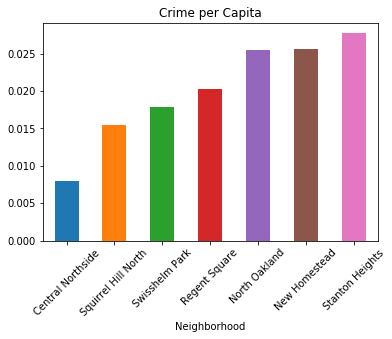

In [10]:
arrest_data_filtered.loc[:,'Offenses per Capita'].plot(kind="bar", title = "Crime per Capita", rot=45)